In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import logging

import numpy as np
import matplotlib.pyplot as plt

In [3]:
import qcsapphire
import qt3rfsynthcontrol
import qt3utils.experiments.cwodmr
import qt3utils.nidaq

In [4]:
pulser = qcsapphire.Pulser('COM10')
rfsynth = qt3rfsynthcontrol.QT3SynthHD('COM5')

In [5]:
nidaq_config = qt3utils.nidaq.EdgeCounter('Dev1')

In [6]:
def plot_trace(trace, N_cycles=1, clock_rate=1):
    plt.plot(np.arange(len(trace)) / clock_rate, trace/N_cycles * clock_rate)

In [7]:
cwodmr = qt3utils.experiments.cwodmr.CWODMR(pulser, rfsynth, nidaq_config,
                                           freq_low=2700e6,
                                           freq_high=3000e6,
                                           freq_step=5e6,
                                           rf_power=-5)

In [8]:
cwodmr.experimental_conditions()

{'freq_low': 2700000000.0,
 'freq_high': 3000000000.0,
 'freq_step': 5000000.0,
 'rf_power': -5,
 'rf_width': 5e-06,
 'clock_period': 2e-07}

In [9]:
logging.basicConfig(level=logging.WARNING)


In [56]:
full_scans = []

for i in range(100):
    if i % 5 == 0:
        print(i)
    scan_data_high = cwodmr.run(N_cycles=1000)
    full_scans.append(scan_data_high)
    
#scan_data_high = cwodmr.run(N_cycles=1000)


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


In [57]:
#combined_scans = [s[0], s[1] for s in full_scans]
combined_scans = {s[0]:np.zeros(s[1]) for s in full_scans[0]}

for scan in full_scans:
    for freq_read in scan:
        freq = freq_read[0]
        data = freq_read[-1]
        combined_scans[freq] += data

reconstructed_single_scan = [[s, len(combined_scans[s]), combined_scans[s]] for s in sorted(list(combined_scans.keys()))]

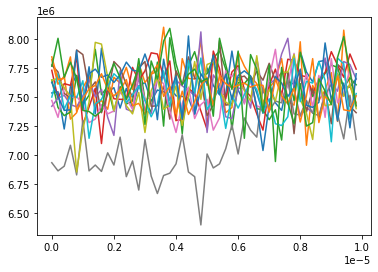

In [58]:
def plot_trace(trace, N_cycles=1, clock_rate=1):
    plt.plot(np.arange(len(trace)) / clock_rate, trace/N_cycles * clock_rate)
    
for scan in reconstructed_single_scan[::5]:
    plot_trace(scan[-1], cwodmr.N_cycles, clock_rate = 1./cwodmr.clock_period)
    
# for freq in list(combined_scans.keys())[::5]:
#     plot_trace(combined_scans[freq], cwodmr.N_cycles, clock_rate = 1./cwodmr.clock_period)

In [59]:
def plot_scan(scan_data):
    two_d_scan_data = np.array([scan[-1] for scan in scan_data])
    signal = two_d_scan_data[:,:two_d_scan_data.shape[1]//4].mean(axis=1)
    background = two_d_scan_data[:,two_d_scan_data.shape[1]//2:].mean(axis=1)
    plt.scatter(np.array([scan[0] for scan in scan_data]), signal/background, s=5)
    

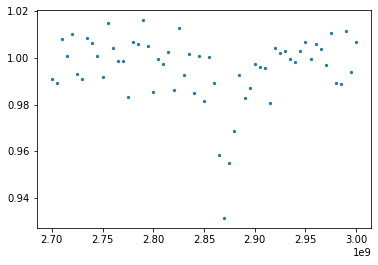

In [60]:
#plt.scatter(np.array([scan[0] for scan in scan_data_1x]), signal/background, s=5)
plot_scan(reconstructed_single_scan)

In [51]:
cwodmr.freq_low = 2500e6
cwodmr.freq_high = 3200e6
cwodmr.freq_step = 1e6

In [52]:
scan_data_magnet = cwodmr.run(N_cycles=10000)

INFO:qt3utils.experiments.cwodmr:RF frequency: 2500000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2501000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2502000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2503000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2504000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2505000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2506000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2507000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2508000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2509000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2510000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2511000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2512000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2513000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 2514000000.0 Hz
INFO:qt3utils.experiments.cwodmr:RF frequency: 25150000

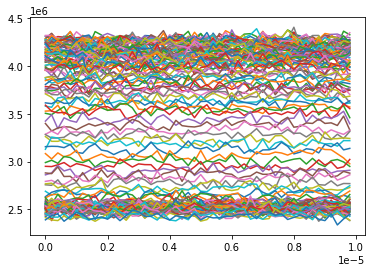

In [53]:
for scan in scan_data_magnet[::5]:
    plot_trace(scan[-1], cwodmr.N_cycles, clock_rate = 1./cwodmr.clock_period)

In [68]:
len(scan_data_magnet)


701

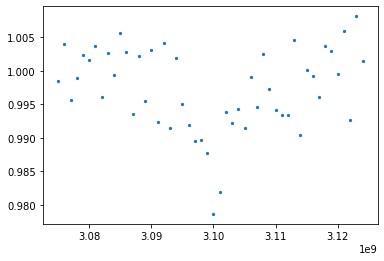

In [74]:
plot_scan(scan_data_magnet[575:625])

In [77]:
f = [s[0] for s in scan_data_magnet[575:625]]
data = [s[-1].sum() for s in scan_data_magnet[575:625]]

In [78]:
list(zip(f,data))

[(3075000000.0, 255613.0),
 (3076000000.0, 254886.0),
 (3077000000.0, 255305.0),
 (3078000000.0, 254341.0),
 (3079000000.0, 254328.0),
 (3080000000.0, 253433.0),
 (3081000000.0, 253676.0),
 (3082000000.0, 254983.0),
 (3083000000.0, 254193.0),
 (3084000000.0, 254899.0),
 (3085000000.0, 254605.0),
 (3086000000.0, 255459.0),
 (3087000000.0, 254181.0),
 (3088000000.0, 254639.0),
 (3089000000.0, 253929.0),
 (3090000000.0, 254553.0),
 (3091000000.0, 254405.0),
 (3092000000.0, 253228.0),
 (3093000000.0, 254317.0),
 (3094000000.0, 254890.0),
 (3095000000.0, 253588.0),
 (3096000000.0, 254315.0),
 (3097000000.0, 254198.0),
 (3098000000.0, 253285.0),
 (3099000000.0, 252283.0),
 (3100000000.0, 252188.0),
 (3101000000.0, 252738.0),
 (3102000000.0, 252623.0),
 (3103000000.0, 253697.0),
 (3104000000.0, 254123.0),
 (3105000000.0, 253675.0),
 (3106000000.0, 253508.0),
 (3107000000.0, 253577.0),
 (3108000000.0, 254108.0),
 (3109000000.0, 253561.0),
 (3110000000.0, 253639.0),
 (3111000000.0, 254675.0),
 